In [1]:
from stat import FILE_ATTRIBUTE_SPARSE_FILE


#pip install FILE_ATTRIBUTE_SPARSE_FILE

In [2]:
import pandas as pd
activities_df = pd.read_csv('data/extended_activities_with_ftp.csv')


In [3]:

# Display the first few rows of the run activities DataFrame
print(activities_df.head())

         Activity Date  Elapsed Time  Distance  Max Heart Rate  \
0  2019-12-13 01:46:07          3859     22.97           139.0   
1  2019-12-20 23:05:01          4852     29.65           133.0   
2  2019-12-21 23:25:29          5817     32.38           139.0   
3  2019-12-24 01:19:17          3851     21.68           140.0   
4  2019-12-26 00:09:08          5843     32.36           131.0   

   Relative Effort  Athlete Weight  Bike Weight  Moving Time  Max Speed  \
0             11.0            84.0          NaN       3811.0       10.2   
1             12.0            84.0          NaN       4693.0       14.1   
2             19.0            84.0          NaN       5601.0       12.0   
3             11.0            84.0          NaN       3816.0       11.4   
4             14.0            80.0          NaN       5740.0       10.9   

   Average Speed  ...  60 Day Maximum Power 30s  60 Day Maximum Power 1.0min  \
0          5.989  ...                     342.1                        2

In [4]:

# Print dimensions of running data before removing null values
print("Dimensions of running data before removing null values:", activities_df.shape)


Dimensions of running data before removing null values: (181, 42)


In [5]:
# Check for null values in each column
null_counts = activities_df.isnull().sum()

# Display the count of null values in each column
print(null_counts)

Activity Date                     0
Elapsed Time                      0
Distance                          0
Max Heart Rate                    0
Relative Effort                   0
Athlete Weight                  111
Bike Weight                      19
Moving Time                       0
Max Speed                         0
Average Speed                     0
Elevation Gain                    1
Elevation Loss                    6
Elevation Low                     6
Elevation High                    6
Max Grade                         0
Average Grade                     0
Max Cadence                       0
Average Cadence                   0
Average Heart Rate                0
Average Watts                     0
Calories                          0
Average Temperature               6
Total Work                        1
Perceived Exertion              180
Weighted Average Power            0
Power Count                       0
Prefer Perceived Exertion       179
Perceived Relative Effort   

In [6]:
import pandas as pd
from sklearn.impute import SimpleImputer
df = pd.DataFrame(activities_df)

# Drop columns with all missing values
non_null_columns = df.columns[df.notna().any()].tolist()
df_non_null = df[non_null_columns]

imputer = SimpleImputer(strategy='most_frequent')  
df_imputed = imputer.fit_transform(activities_df)


In [7]:
# Convert the NumPy array back to a DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=non_null_columns)

# Check for null values in the filtered DataFrame
null_counts_filtered = df_imputed.isnull().sum()

# Display the count of null values in each column
print(null_counts_filtered)

Activity Date                   0
Elapsed Time                    0
Distance                        0
Max Heart Rate                  0
Relative Effort                 0
Athlete Weight                  0
Bike Weight                     0
Moving Time                     0
Max Speed                       0
Average Speed                   0
Elevation Gain                  0
Elevation Loss                  0
Elevation Low                   0
Elevation High                  0
Max Grade                       0
Average Grade                   0
Max Cadence                     0
Average Cadence                 0
Average Heart Rate              0
Average Watts                   0
Calories                        0
Average Temperature             0
Total Work                      0
Perceived Exertion              0
Weighted Average Power          0
Power Count                     0
Prefer Perceived Exertion       0
Perceived Relative Effort       0
Average Elapsed Speed           0
60 Day Maximum

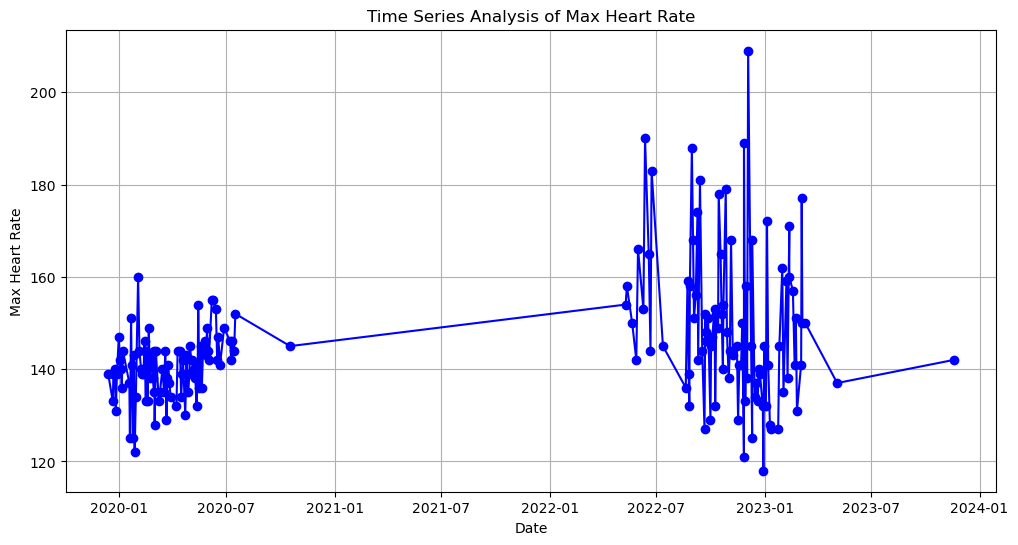

In [8]:
import matplotlib.pyplot as plt
# Convert 'Activity Date' to datetime
df['Activity Date'] = pd.to_datetime(df['Activity Date'])

# Set 'Activity Date' as the index
df.set_index('Activity Date', inplace=True)

# Plot the time series for 'Max Heart Rate'
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Max Heart Rate'], marker='o', linestyle='-', color='b')
plt.title('Time Series Analysis of Max Heart Rate')
plt.xlabel('Date')
plt.ylabel('Max Heart Rate')
plt.grid(True)
plt.show()


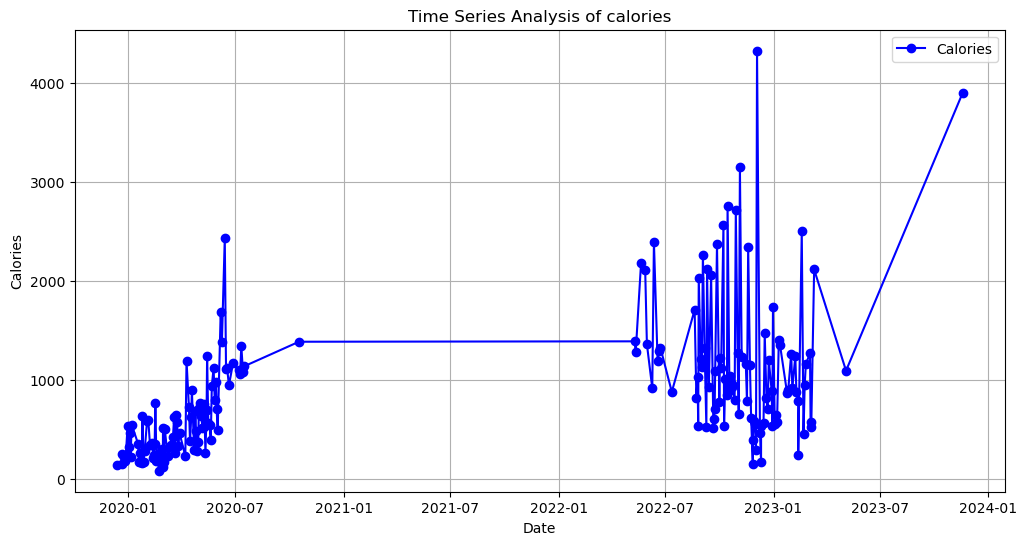

In [14]:


# Plot the time series for 'Average Watts' and 'Weighted Average Power'
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Calories'], marker='o', linestyle='-', color='b', label='Calories')

plt.title('Time Series Analysis of calories')
plt.xlabel('Date')
plt.ylabel('Calories')
plt.legend()
plt.grid(True)
plt.show()

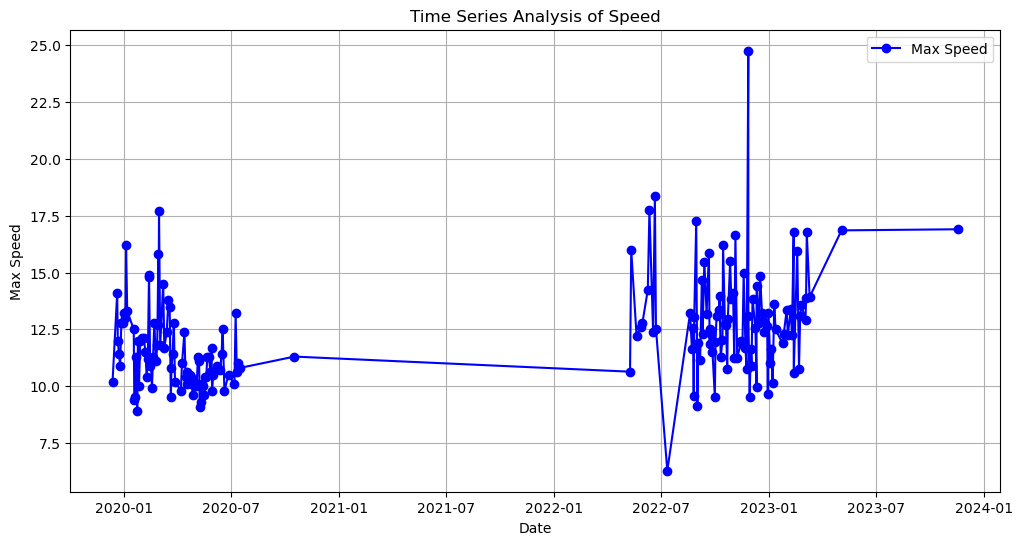

In [16]:
# Plot the time series for 'Average Watts' and 'Weighted Average Power'
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Max Speed'], marker='o', linestyle='-', color='b', label='Max Speed')

plt.title('Time Series Analysis of Speed')
plt.xlabel('Date')
plt.ylabel('Max Speed')
plt.legend()
plt.grid(True)
plt.show()

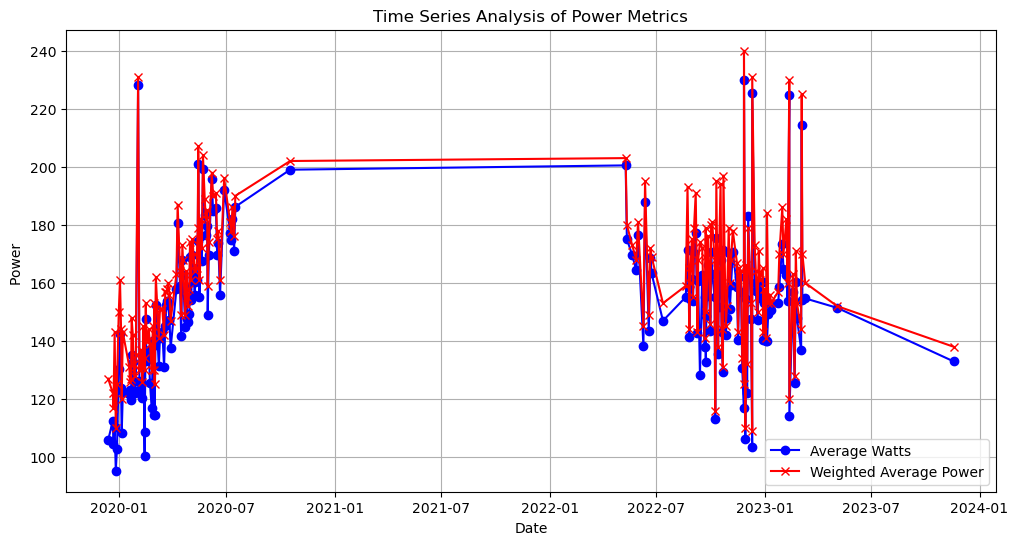

In [18]:
# Plot the time series for 'Average Watts' and 'Weighted Average Power'
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Average Watts'], marker='o', linestyle='-', color='b', label='Average Watts')
plt.plot(df.index, df['Weighted Average Power'], marker='x', linestyle='-', color='r', label='Weighted Average Power')
plt.title('Time Series Analysis of Power Metrics')
plt.xlabel('Date')
plt.ylabel('Power ')
plt.legend()
plt.grid(True)
plt.show()